# Prevendo a evasão de clientes(Churn) e seu perfil

Definindo o problema de negócio:
Classifique se um cliente vai se desligar ou não. Quais as características desses clientes que deixaram a empresa? O que tem em comum? Como podemos evitar que determinados clientes se desliguem da empresa?

**Estaremos resolvendo um problema de classificação com o objetivo de prever o resultado da variável 'Exited'. Vamos realizar uma analise exploratória sobre esses dados;**

**Importação e Análise Exploratória dos dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lighthouse/Abandono_clientes.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Deletando tabelas irrelevantes para a nossa análise(Sobrenome e Id do cliente):

In [ ]:
df = df.drop(columns=['CustomerId', 'Surname'])

In [ ]:
df.isnull().sum()

RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Felizmente não foi necessário tratar dados ausentes.

In [ ]:
df.nunique()

RowNumber          10000
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Notamos que estamos trabalhando com clientes de três países: França, Alemanha, Espanha e 4 produtos distintos

In [ ]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Oservando a tabela que descreve os dados podemos dizer que os clientes dessa agência bancária possuem em média:**
* 39 anos
* Creditscore de 650 pontos
* Tenure de 5
* 76 mil balance em sua conta e 1,5 produtos
* O salário estimado(EstimatedSalary) é de 100.000
* 70% possuem cartão de crédito e 51% são membros ativos

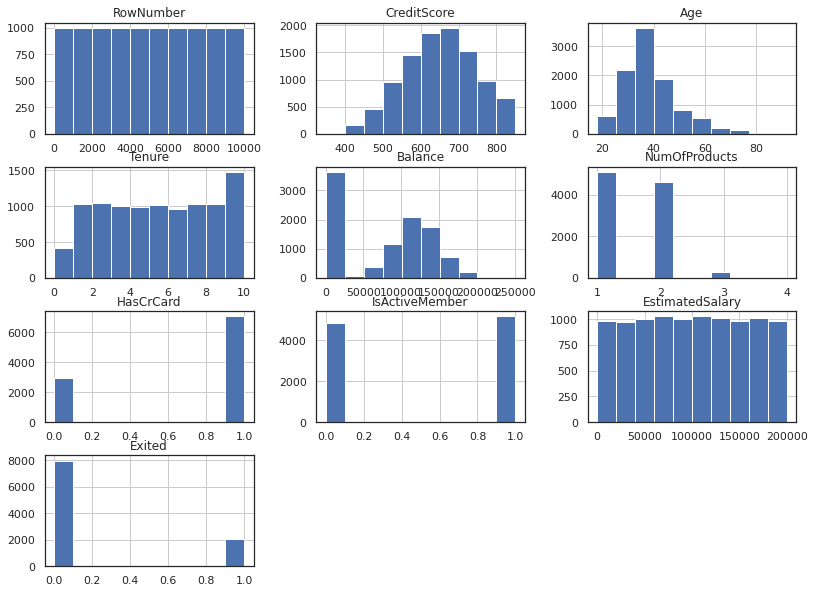

In [ ]:
df.hist(figsize=(12,10));

- a maioria dos clientes têm entre 30 a 45 anos e poucos clientes têm idade superior a 60 anos.
- a variável balance mostra uma inflação de clientes que têm pouco dinheiro na conta bancária, isso pode implicar que talvez esses clientes possuem outra conta bancária.
- muitos clientes possuem 1 ou 2 produtos, mas poucos possuem 3 ou mais.
- cerca de 2mil clientes deixaram o banco, vamos analisar isso

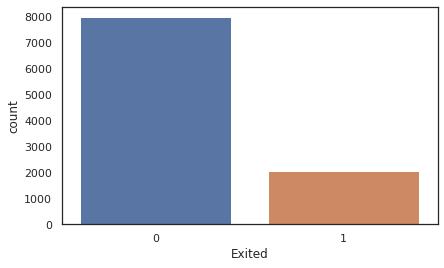

In [ ]:
sns.countplot(data=df,x='Exited');

Percebemos que cerca de 2 mil dos clientes mudaram de banco e que esse dataset está de certa forma desbalanceado com 8 mil clientes classificados como 0 (mantiveram a conta) contra 2 mil como 1 (cancelaram a conta ou mudaram de banco)

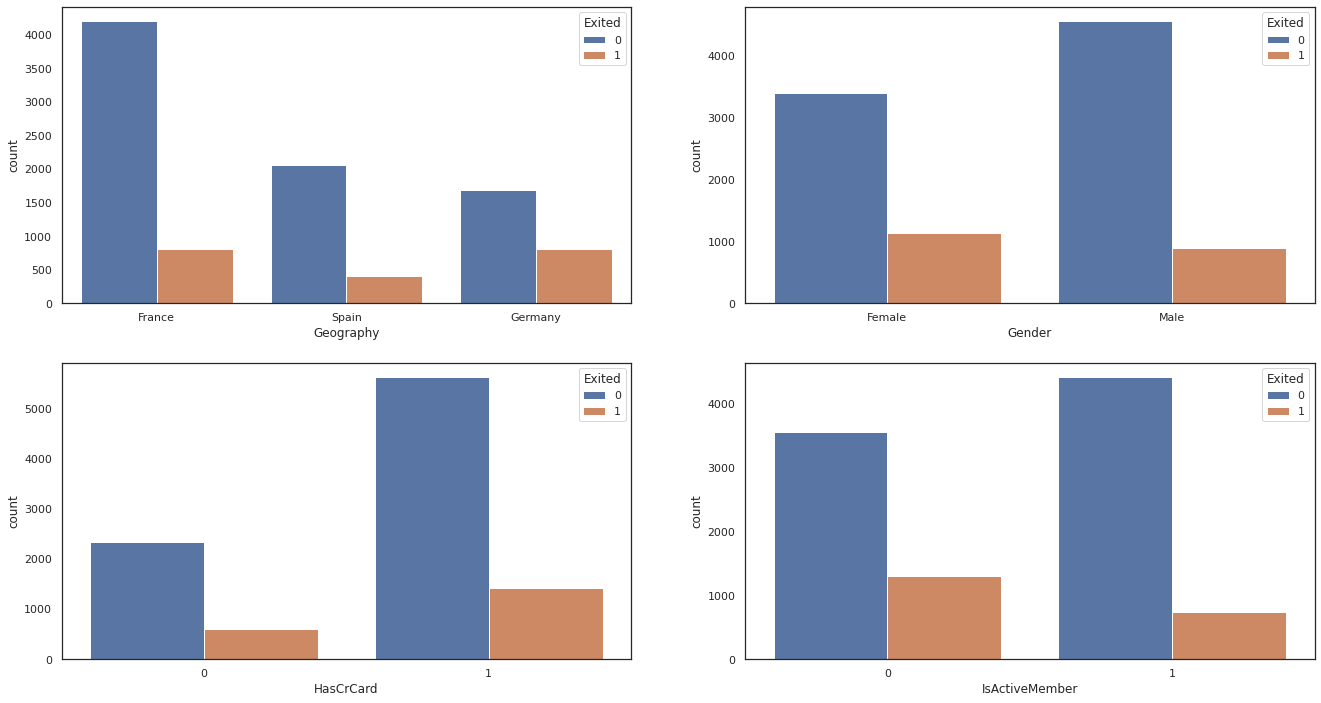

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

- O numero de churn é maior entre as mulheres
- A maioria dos dados é de pessoas da França, mas uma proporção elevada de pessoas da alemanha deixaram o banco
- Não é surpresa que os membros inativos tenham uma saida maior

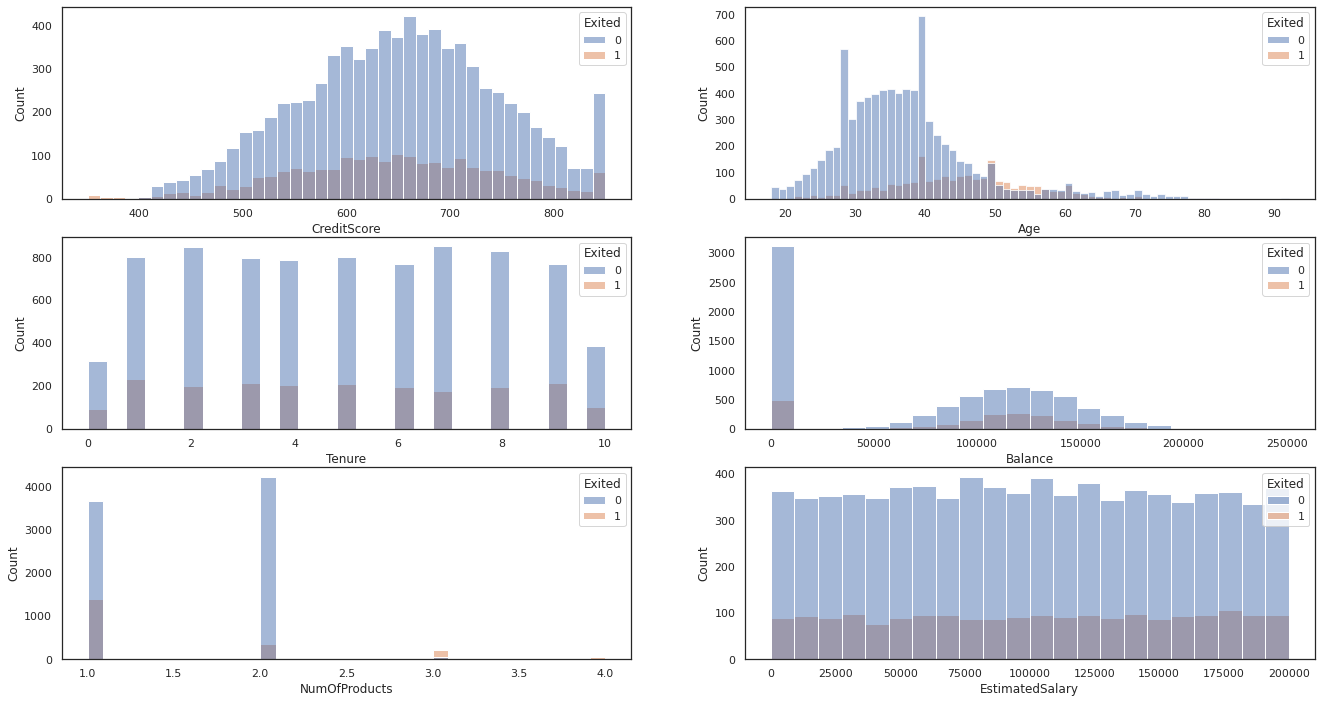

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.histplot(x='CreditScore', hue = 'Exited', data = df, ax=axarr[0][0])
sns.histplot(x='Age', hue = 'Exited',data = df, ax=axarr[0][1])
sns.histplot(x='Tenure', hue = 'Exited',data = df, ax=axarr[1][0])
sns.histplot(x='Balance', hue = 'Exited',data = df, ax=axarr[1][1])
sns.histplot(x='NumOfProducts', hue = 'Exited',data = df, ax=axarr[2][0])
sns.histplot(x='EstimatedSalary', hue = 'Exited',data = df, ax=axarr[2][1])

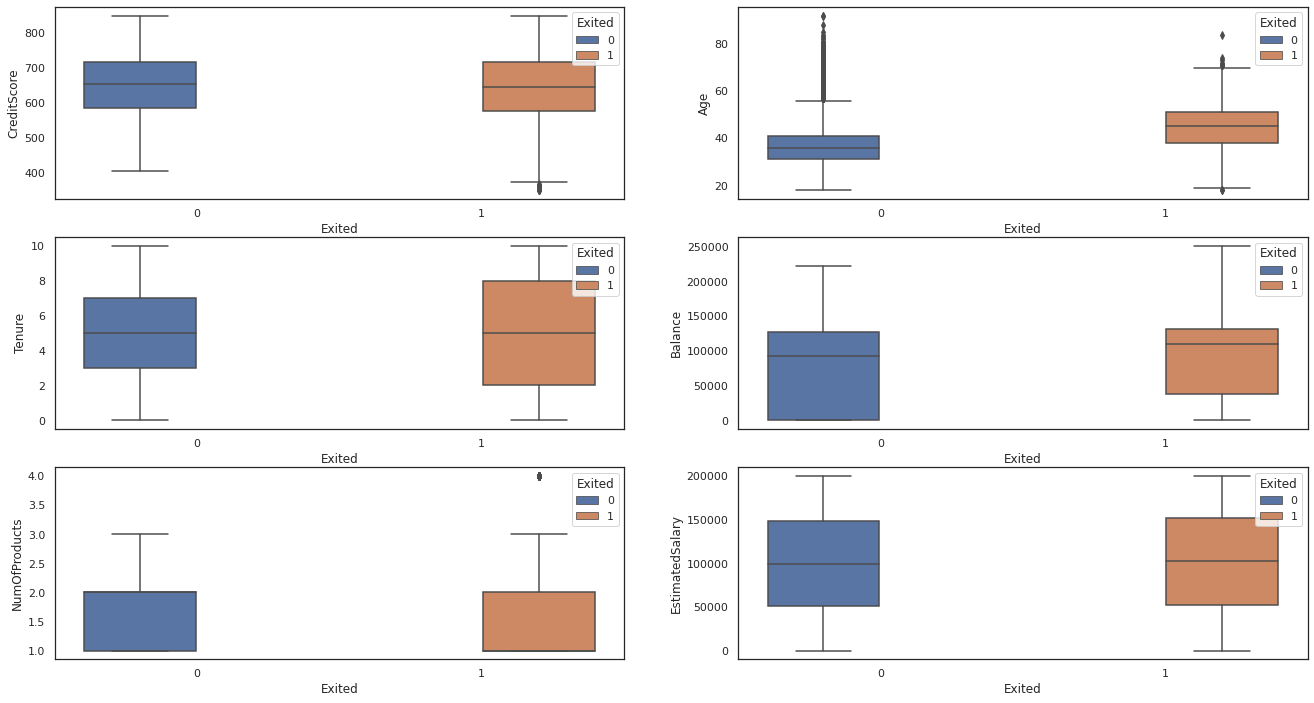

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

- Os clientes mais velhos estão saindo mais do que os mais jovens
- É preocupante que o banco esteja perdendo clientes com saldos bancários significativos. Há uma maior variância na variável Tenure para os clientes que deixaram o banco
- Não há diferença significativa na distribuição dos produtos, salários e scores entre as classes, implicando que no geral não influenciam tanto

# **Pré-Processamento dos dados**

Devemos transformar a classe Gender(Genero) para um valor binário 1 e 0, pois algoritmos de Machine Learning não funcionam com strings, a função label encoder fará isso 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) 
df.round()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,0,42,2,0.0,1,1,1,101349.0,1
1,2,608,Spain,0,41,1,83808.0,1,0,1,112543.0,0
2,3,502,France,0,42,8,159661.0,3,1,0,113932.0,1
3,4,699,France,0,39,1,0.0,2,0,0,93827.0,0
4,5,850,Spain,0,43,2,125511.0,1,1,1,79084.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,1,39,5,0.0,2,1,0,96271.0,0
9996,9997,516,France,1,35,10,57370.0,1,1,1,101700.0,0
9997,9998,709,France,0,36,7,0.0,1,0,1,42086.0,1
9998,9999,772,Germany,1,42,3,75075.0,2,1,0,92889.0,1


Temos um problema semelhante com as variáveis Geography e NumOfProducts. Para esse caso vamos utilizar a função get dummies do próprio pandas que transforma uma variável em variável dummy, ou seja, ele cria novas colunas de variáveis que também as transformam em binárias como feito com a variável Gender.

In [ ]:
df = pd.get_dummies (data = df, columns = ['Geography','NumOfProducts'] )
df.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,619,0,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,2,608,0,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,3,502,0,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,4,699,0,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,5,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0


Observe que as variáveis numéricas Balance, Estimated Salary, Age e Credit Score estão em diferentes escalas e isso pode causar problemas na hora de treinarmos nossos modelos,  utilizaremos o StandardScaler que irá normalizar os dados de tal forma que a distribuição terá um valor médio 0 e um desvio padrão de 1.

In [ ]:
c = ['CreditScore','Balance','Age','EstimatedSalary','Tenure']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[c] = sc.fit_transform(df[c])
df

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,0.021886,1,1,0,0,1,0,0,0
1,2,-0.440036,0,0.198164,-1.387538,0.117350,0,1,0.216534,0,0,0,1,1,0,0,0
2,3,-1.536794,0,0.293517,1.032908,1.333053,1,0,0.240687,1,1,0,0,0,0,1,0
3,4,0.501521,0,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,1,0,0,0,1,0,0
4,5,2.063884,0,0.388871,-1.041760,0.785728,1,1,-0.365276,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1.246488,1,0.007457,-0.004426,-1.225848,1,0,-0.066419,0,1,0,0,0,1,0,0
9996,9997,-1.391939,1,-0.373958,1.724464,-0.306379,1,1,0.027988,0,1,0,0,1,0,0,0
9997,9998,0.604988,0,-0.278604,0.687130,-1.225848,0,1,-1.008643,1,1,0,0,1,0,0,0
9998,9999,1.256835,1,0.293517,-0.695982,-0.022608,1,0,-0.125231,1,0,1,0,0,1,0,0


Agora, nós podemos treinar modelos, ver como se saem e escolher o melhor a partir da medida de performarce que é a ROC AUC que foi a escolhida por considerar a taxa de verdadeiros-positivos contra a taxa de falsos-positivos. Ou seja, numero de vezes que o classificador acertou a predição contra o número de vezes que o classificador errou a predição, pois pelo menos nesse caso específico não tenho o interesse em avaliar especificamente os erros para uma classe única(1 e 0).

#Preparando os dados de treino e teste



In [ ]:
y = df['Exited']
X = df.drop(['Exited', 'RowNumber'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)

##Treinando os modelos
Vamos avaliar 4 modelos: Random Forest, Logistic Regression, Decision three e XGB Classifier

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(random_state = 42)
rf.fit (X_train, y_train);

In [ ]:
y_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
rocRF = roc_auc_score(y_test, y_rf)
print('roc_auc_score = ', rocRF)

roc_auc_score =  0.7234681177429026


Vamos avaliar o desempenho do modelo com o Cross Validation(CV) que consiste em particionar os dados em conjuntos(partes), onde um conjunto é utilizado para treino e outro conjunto é utilizado para teste e avaliação do desempenho do modelo.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_train = cross_val_score(rf, X_train, y_train, cv=5)

In [ ]:
scores_train

array([0.85733333, 0.86066667, 0.86266667, 0.85866667, 0.85666667])

In [ ]:
scores_test = cross_val_score(rf, X_test, y_test, cv=5)

In [ ]:
scores_test
#tudo ok!

array([0.864, 0.842, 0.844, 0.858, 0.874])

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_lr = logistic.predict(X_test)

In [ ]:
rocRF = roc_auc_score(y_test, y_lr)
print('roc_auc_score = ', rocRF)

roc_auc_score =  0.663884957272341


In [ ]:
#XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
y_xgb = xgb.predict(X_test)

In [ ]:
rocXGB = roc_auc_score(y_test, y_xgb)
print('roc_auc_score = ', rocXGB)

roc_auc_score =  0.7171822748774223


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_dtc = dtc.predict(X_test)

Diante dos resultados dos 4 modelos, os que se sairam melhor para prever o churn firam o RandomForest e o XGBbost mesmo sem o uso de parâmetros, vamos agora com o uso do GridSearch encontrar os melhores parametros para esses modelos e utiliza-los.

Aplicando o GridSearch ao Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = { 
'n_estimators': [200, 400, 600],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [6,7,8],
'criterion' :['gini', 'entropy']
}

In [ ]:
# grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv = 3)
# grid_rf.fit(X_train, y_train)

In [ ]:
#grid_rf.best_params_ 
#resultado: {'criterion': 'entropy', 'max_depth': 8,'max_features': 'auto','n_estimators': 600}

In [ ]:
rf2 = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=8, max_features='auto', n_estimators=600)

In [ ]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=600,
                       random_state=42)

In [ ]:
y_rf2 = rf2.predict(X_test)

In [ ]:
roc_rf = roc_auc_score(y_test, y_rf2)
print('roc_auc_score = ', roc_rf)

roc_auc_score =  0.7012976511088499


Tivemos um resultado inferior ao modelo sem os parâmetros, o que me surpreendeu.

Devido a demora ao utilizar o GridSearch, no XGB vamos estar utilizando o RandomSearch.

**Aplicando RandomSearch ao XGB**

Mesmo tunando os parâmetros, não tivemos o resultado esperado ao prever a saída de clientes(Churn), o RandomForest sem os parametros se saiu melhor.
Como o RadomForest se saiu melhor ao classificar a saída e o XGB a permanência uma estratégia a ser utilizada seria a combinação deles com o uso do Essemble:

In [ ]:
params_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# xgb3 = XGBClassifier(random_state=42)
# random_xgb = RandomizedSearchCV(xgb3,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=10,verbose=3)
# random_xgb.fit(X_train,y_train)

In [ ]:
print(random_xgb.best_estimator_)

XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.15,
              min_child_weight=3, random_state=42)


In [ ]:
xgb3 = XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, min_child_weight=3, random_state=42)
xgb3.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.4, learning_rate=0.15,
              min_child_weight=3, random_state=42)

In [ ]:
y_xgb3 = xgb3.predict(X_test)
rocXGB3 = roc_auc_score(y_test, y_xgb3)

In [ ]:
print('roc_auc_scoreXGB = ', rocXGB3)

roc_auc_scoreXGB =  0.7237252772752341


Os dois modelos que tiveram o melhor resultado foram o Random forest sem os parâmetros e o XGB após o uso do RandomForest com seus parâmetros encontrados.

Vamos avaliar ambos com outras métricas:

roc_auc_score_RandomForest =  0.7234681177429026
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



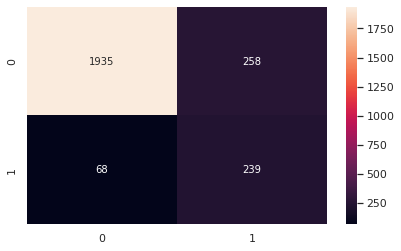

In [ ]:
#RandomForest
from sklearn.metrics import classification_report,confusion_matrix
cm_rf = confusion_matrix(y_rf, y_test)
sns.heatmap(cm_rf, annot=True, annot_kws={"size": 10},fmt="d");
rocRF = roc_auc_score(y_test, y_rf)
print('roc_auc_score_RandomForest = ', rocRF)
print(classification_report(y_test, y_rf))

roc_auc_score_XGB =  0.7237252772752341
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.77      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



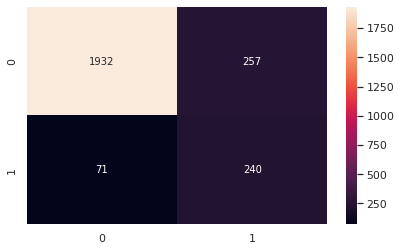

In [ ]:
#XGBClassifier
cm_xgb = confusion_matrix(y_xgb3, y_test)
sns.heatmap(cm_xgb, annot=True, annot_kws={"size": 10},fmt="d");
print('roc_auc_score_XGB = ', rocXGB3)
print(classification_report(y_test, y_xgb3))

Prós e contras:

Como resultado o modelo classifica muito bem os casos em que os clientes mantiveram a conta = 0, mas não tão bem para os que deixaram = 0, isso pode ocorrer devido ao desbalenceamento dos dados.

Apesar disso os dois modelos apresentam resultados bem semelhantes, uma estratégia que podemos utilizar é o Método Essemble que combina os dois modelos.

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.79      0.48      0.60       497

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

Roc auc score VotingClassifier =  0.7252230306451791


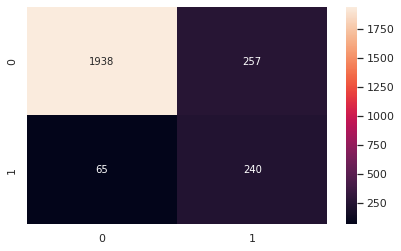

In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('rf', rf),('xgb3',xgb3)], voting='soft')
vc = vc.fit(X_train,y_train)
y_vc = vc.predict(X_test)
roc_VotingClassifier = roc_auc_score(y_test, y_vc)
print(classification_report(y_test, y_vc))
print('Roc auc score VotingClassifier = ', roc_VotingClassifier)
cm_vc = confusion_matrix(y_vc, y_test)
sns.heatmap(cm_vc, annot=True, annot_kws={"size": 10},fmt="d");

# O modelo utilizado será a Combinação do RandomForest com o XGB

Vamos estimar as variáveis mais importante para o Churn dos clientes:

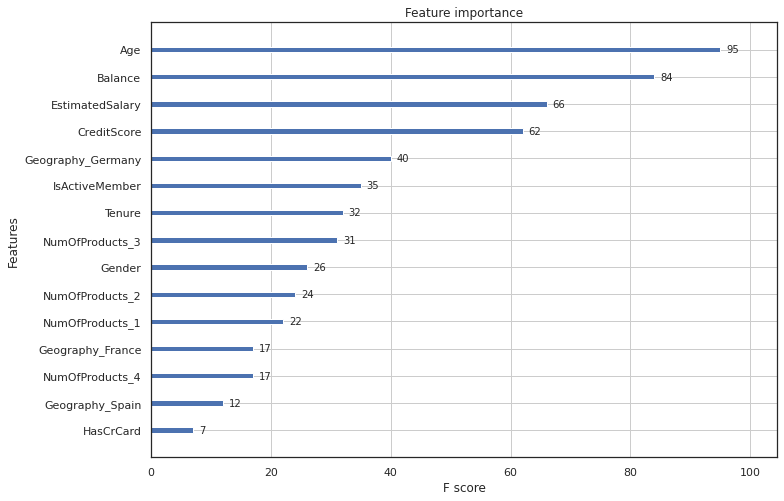

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb3, ax=ax)

foram elas: idade, saldo bancário, pontuação de crédito, estimativa de salário, membro ativo e país Alemanha.

Vamos estimar agora a probablidade do cliente dar Churn, onde quanto mais próximo do valor 1, maior a chance de evasão. O resultado é apresentado como a probabilidade entre 1 e 0. Salvando essas probabilidades na tabela 'Abandono_teste.csv' para ser entregue junto ao projeto.

In [ ]:
df['predictedValues'] = vc.predict_proba(X[X_train.columns])[:,1]
df[['RowNumber','predictedValues']]

,RowNumber,predictedValues
0,1,0.325466
1,2,0.121795
2,3,0.946586
3,4,0.103875
4,5,0.117053
...,...,...
9995,9996,0.014414
9996,9997,0.079301
9997,9998,0.436668
9998,9999,0.092380


In [ ]:
df_predito = df[['RowNumber','predictedValues']]

In [ ]:
df_predito

,RowNumber,predictedValues
0,1,0.325466
1,2,0.121795
2,3,0.946586
3,4,0.103875
4,5,0.117053
...,...,...
9995,9996,0.014414
9996,9997,0.079301
9997,9998,0.436668
9998,9999,0.092380


# Salvando o resultado em um arquivo csv

In [ ]:
df_predito.to_csv('Resultado_Modelo_NatanXimenes.csv')
!cp Resultado_Modelo_NatanXimenes.csv "drive/My Drive/"

A partir desse resultado, das características dos clientes que cancelaram o serviço e com a informação das varíaveis predominates para ocasionar o churn, o time de negócio poderá prever clientes com a maior de cancelamento e assim tomar medidas preventivas, afim de evitar essa saída.